In [1]:
# Import the modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
plt.style.use('ggplot')

### 1. Classification
In this exercise we will practice two classification methods kNN and decision tree. 
The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the 8 attributes (TYNECKI, 2018): pregnancies, OGTT(Oral Glucose Tolerance Test), blood pressure, skin thickness, insulin, BMI(Body Mass Index), age, pedigree diabetes function. 

In [2]:
diabetes = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter10/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### kNN classifier

#### Instructions (2 points)
- import `KNeighborsClassifier` from `sklearn.neighbors`
- create a kNN classifier with 4 neighbors
- fit the classifier to X and y, and store the predicted values in `y_pred`
- print out the accuracy of the classifier using `accuracy_score` function

In [4]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# import `KNeighborsClassifier`
from sklearn.neighbors import KNeighborsClassifier
# create a kNN classifier with 4 neighbors
knn = KNeighborsClassifier(n_neighbors = 4)
# fit the classifier to X and y, and store the predicted values in `y_pred`
knn.fit(X, y)
y_pred = knn.predict(X)

from sklearn.metrics import accuracy_score
# print out the accuracy of the classifier using `accuracy_score` function
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8138020833333334


#### Decision Tree classifier

#### Instructions (2 points)
- import `DecisionTreeClassifier` from `sklearn.tree`
- create a decision tree classifier object with `4` as the max_depth and `entropy` as the criterion.
- fit the classifier to X and y, and store the predicted values in `y_pred`
- print out the accuracy of the classifier using `accuracy_score` function

In [5]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(X, y)

#Predict the response for test dataset
y_pred = dt.predict(X)

from sklearn.metrics import accuracy_score
# print out the accuracy of the classifier using `accuracy_score` function
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.7864583333333334


#### Instructions (1 point)
- import `plot_tree` from `sklearn.tree`
- plot the decision tree `dt` with the class_names of `['Normal', 'Diabetic']`, feature_names of `X.columns`

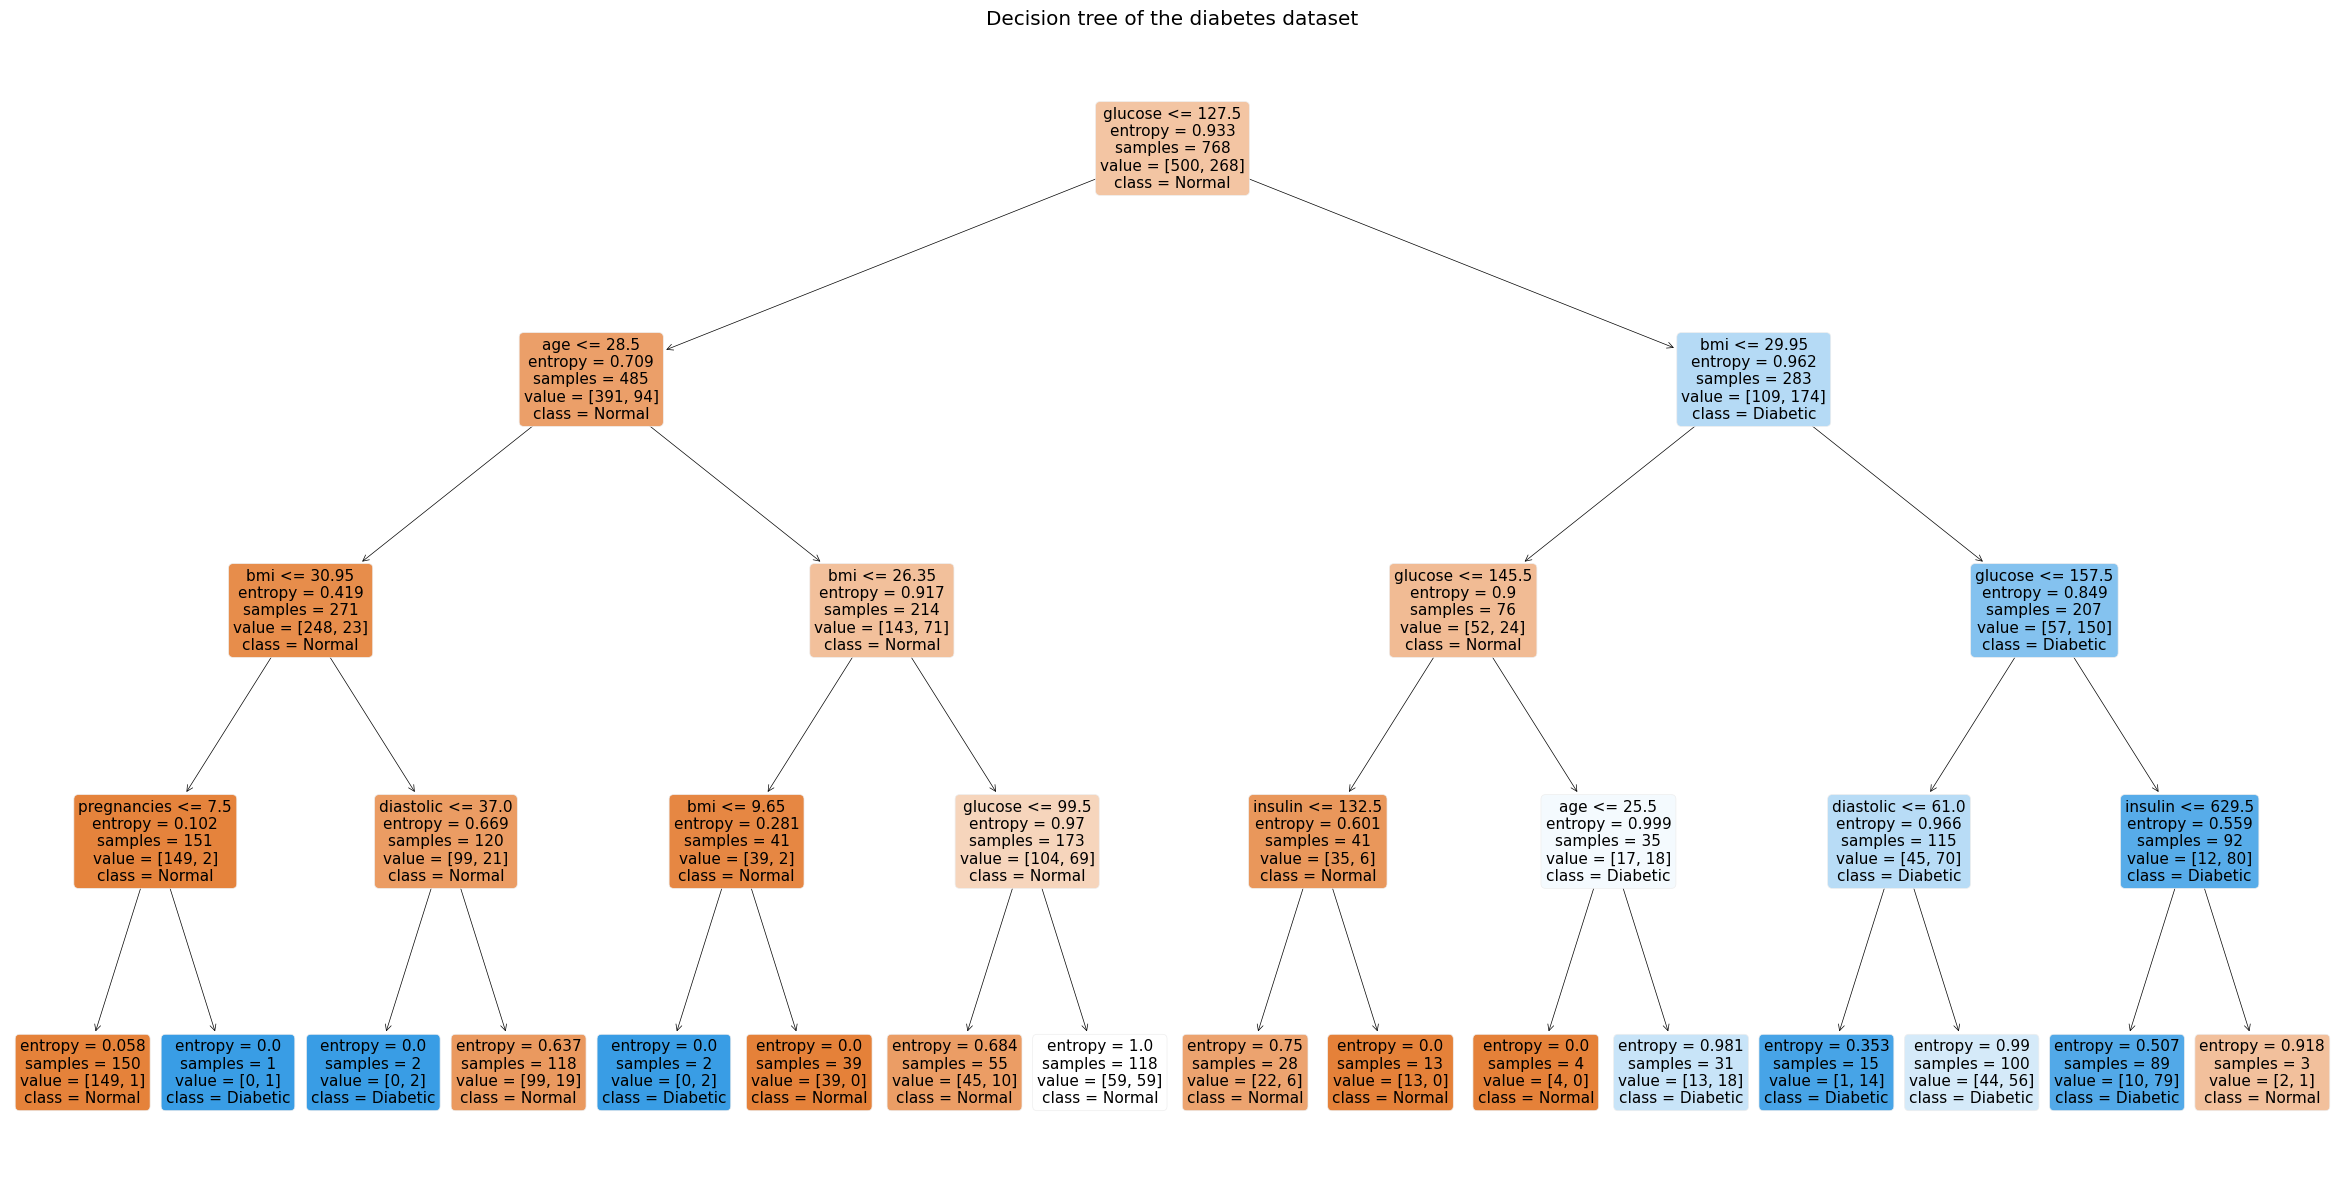

In [6]:
# import `plot_tree`
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(dt, filled=True, fontsize=11, feature_names=X.columns, 
          rounded=True, class_names =['Normal', 'Diabetic'])
plt.title("Decision tree of the diabetes dataset")
plt.show()

### 2. Regression with statsmodels

#### Linear regression with a categorical explanatory variable
Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

| **Variable**          | **Meaning**                                                         |
|-----------------------|---------------------------------------------------------------------|
| dist_to_mrt_station_m | Distance to nearest MRT metro station, in meters.                   |
| n_convenience         | No. of convenience stores in walking distance.                      |
| house_age_years       | The age of the house, in years, in three groups.                    |
| price_twd_msq         | House price per unit area, in New Taiwan dollars per meter squared. |



In [7]:
taiwan_real_estate = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/HWs/taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


#### Instructions (0.5 point)
- before we start, first we take a look at the average price for each house age group. You can do this using `groupby()` method of a dataframe

In [8]:
# Calculate the mean of price_twd_msq, grouped by house_age_years
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


To run a linear regression model with a categorical explanatory variable `var_name`, you use `C(var_name)` to enter the variable into the formula. The coefficients returned by the model are different however. Here you'll run a linear regression on the Taiwan real estate dataset.
#### Instructions (0.5 point)
- create an OLS model that predicts `price_twd_msq` with a categorical explanatory variable `house_age_years` and fit it to the data.
- print out the model parameters. They are stored in the `params` attribute of the model.

In [9]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model, fit it
model1 = ols('price_twd_msq~C(house_age_years)', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(model1.params)

Intercept                         12.637471
C(house_age_years)[T.15 to 30]    -2.760728
C(house_age_years)[T.30 to 45]    -1.244207
dtype: float64


By defaut, the OLS model includes an intercept. Because the 3 categories of `house_age_years` add up to 1, only two categories of `house_age_years` are identified. You can choose to drop the intercept so that all 3 categories of `house_age_years` are indentified.
#### Instructions (0.5 point)
- Update the model formula to remove the intercept. To do this, in the formula, add `0` as a predictor variable
- print out the model parameters.

In [10]:
# Update the model formula to remove the intercept
model2 = ols('price_twd_msq ~ C(house_age_years) +0', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(model2.params)

C(house_age_years)[0 to 15]     12.637471
C(house_age_years)[15 to 30]     9.876743
C(house_age_years)[30 to 45]    11.393264
dtype: float64


#### Instructions (0.5 point)
- Update the model formula to add `n_convenience` as a predictor variable
- print out the summary results of the model

In [11]:
# Update the model formula to add n_convenience
model3 = ols('price_twd_msq ~ house_age_years+n_convenience', data=taiwan_real_estate).fit()

# Print the summary results of the fitted model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     89.29
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.75e-44
Time:                        16:38:45   Log-Likelihood:                -1068.7
No. Observations:                 414   AIC:                             2145.
Df Residuals:                     410   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Note that the coefficient of `house_age_years[30 to 45]` is greater than `house_age_years[15 to 30]`, which is conterintuitive. It means that older houses (with age range 30 to 45) are worth more than younger houses (with age range 15 to 30) on average. It's likely that older houses are closer to metro stations so that the estimation is biased without adding the explanatory variable `dist_to_mrt_m` (a situation called `omitted variable bias`).

Let's add `dist_to_mrt_m` to the regression. But should we transform the variable first?

### Transforming variables before modeling

A solution to model data better, before adapting the model, is often to better understand and transform the data first if necessary (cube, square, log, exp, etc).

#### Instructions (0.5 point)
Let's first examine if `dist_to_mrt_m` has a liner relationship with `price_twd_msq` by creating a liner regression plot. The seaborn package has a `regplot()` function that plots data and a linear regression model fit.
- use the `regplot()` function to plot `price_twd_msq` against `dist_to_mrt_m` with a linear regression model fit.


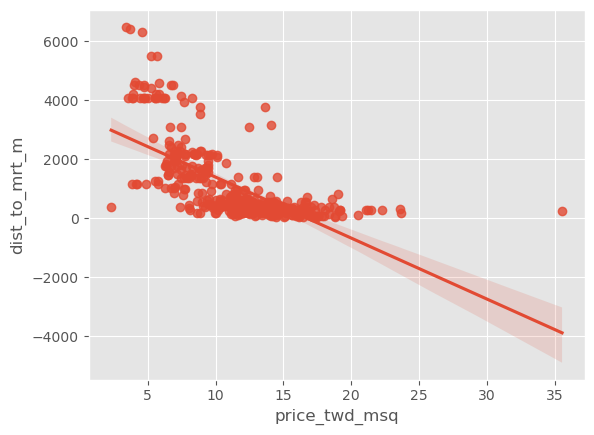

In [12]:
# Clear the plot
plt.figure()

# use the `regplot()` function to plot `price_twd_msq` against `dist_to_mrt_m` with a linear regression model fit.
sns.regplot(x='price_twd_msq', y='dist_to_mrt_m', data=taiwan_real_estate)
plt.show()

The resulting plot clearly shows that the relationship is nonlinear. We can also see this from a `residual plot` that shows the difference between the observed response and the fitted response values. The ideal residual plot, called the null residual plot, shows a random scatter of points forming an approximately constant width band around the identity line.

#### Instructions (0.5 point)
The seaborn package provides a `residplot()` function that plots the residuals of a linear regression.
- use the `residplot()` function to plot the residuals of a linear regression of `price_twd_msq` against `dist_to_mrt_m`

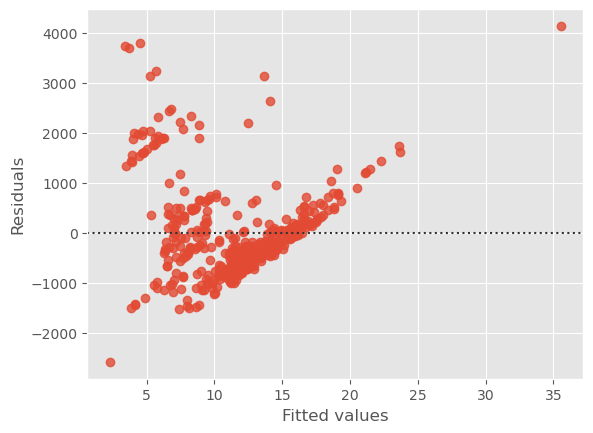

In [13]:
# Clear the plot
plt.figure()
# use the `residplot()` function to plot the residuals of a linear regression of `price_twd_msq` against `dist_to_mrt_m`
sns.residplot(x='price_twd_msq', y='dist_to_mrt_m', data=taiwan_real_estate)

plt.xlabel("Fitted values") 
plt.ylabel("Residuals")
plt.show()

Again, the residual plot suggests the relationship between `price_twd_msq` and `dist_to_mrt_m` is nonlinear.

Now let's transform `dist_to_mrt_m` with a log function. It's likely that `dist_to_mrt_m` has overdispersion because it is measured in meters, and it's common to use a log transformation to address this issue.
#### Instructions (0.5 point)
- use `np.log()` to compute the log of `dist_to_mrt_m` and store the result in a new column in `taiwan_real_estate` dataframe called `log_dist_to_mrt_m`.
- now create a regression plot using the transformed variable, again using `regplot()` function from seaborn

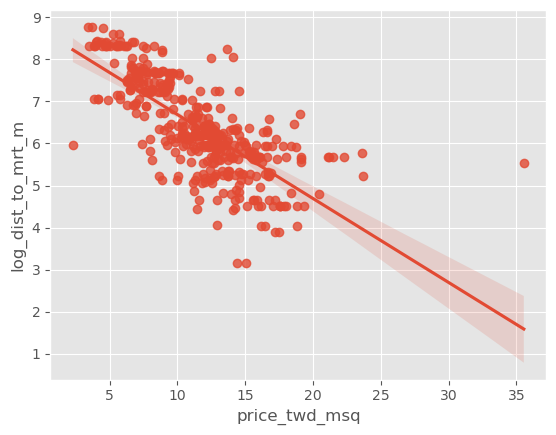

In [14]:
# use `np.log()` to compute the log of `dist_to_mrt_m` and store the result in a new column in `taiwan_real_estate` dataframe called `log_dist_to_mrt_m`.
taiwan_real_estate['log_dist_to_mrt_m'] = np.log(taiwan_real_estate['dist_to_mrt_m'])

# Clear the plot
plt.figure()

# create a regression plot using the transformed variable
sns.regplot(x='price_twd_msq', y='log_dist_to_mrt_m', data=taiwan_real_estate)
plt.show()

This time the figure shows a roughly linear relationship. We can also verify this by the residual plot.

#### Instructions (0.5 point)
- create a residual plot using the transformed variable, using the `residplot()` function of seaborn.

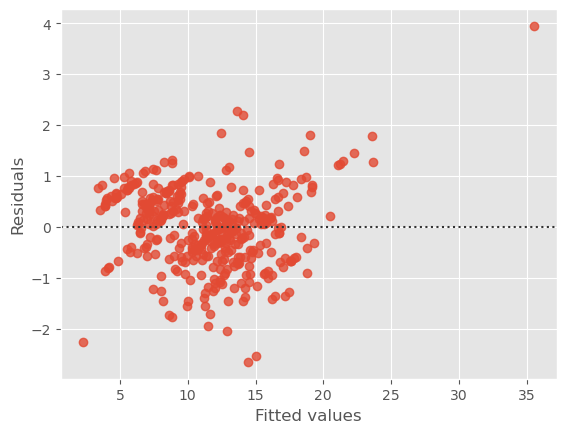

In [15]:
# Clear the plot
plt.figure()
# create a residual plot using the transformed variable, using the `residplot()` function of seaborn.
sns.residplot(x='price_twd_msq', y='log_dist_to_mrt_m', data=taiwan_real_estate)

plt.xlabel("Fitted values") 
plt.ylabel("Residuals")
plt.show()

#### Instructions (1 point)
- now add `log_dist_to_mrt_m` into the OLS model as a predictor variable, and fit the model
- Print the summary results of the fitted model

In [16]:
# add `log_dist_to_mrt_m` into the OLS model as a predictor variable
model4 = ols('price_twd_msq ~ C(house_age_years)+log_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the summary results of the fitted model
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     174.2
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           8.14e-73
Time:                        16:39:05   Log-Likelihood:                -1002.7
No. Observations:                 414   AIC:                             2013.
Df Residuals:                     410   BIC:                             2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In deed, after we add `log_dist_to_mrt_m` to the regression, now the coefficient of `house_age_years[30 to 45]` is smaller than `house_age_years[15 to 30]`, which is more consistent with common sense.

### 3. logistic regressions
Logistic Regression is a type of generalized linear model for categorical responses. The response follow a logistic S curve. We can think about the fitted values between 0 and 1 as probabilities.

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, affect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

This data set has a binary response (outcome, dependent) variable called `admit`. There are three predictor variables: `gre`, `gpa` and `rank`. We will treat the variables `gre` and `gpa` as continuous. The variable `rank` takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

In [17]:
admission = pd.read_csv("https://github.com/huangpen77/BUDT704/raw/main/HWs/admission.csv")
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float64
 1   gre     400 non-null    float64
 2   gpa     400 non-null    float64
 3   rank    400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


#### Instructions (1 point)
To fit a logistic regression model, use `logit()` function in `statsmodels.formula.api`.

- use `logit()` function to fit a logistic regression model with `admit` as the dependent variable, and `gre`, `gpa` and `rank` as predictor variables. You should enter `rank` as a categorical variable, and remove intercept from the regression model.
- print out the summary results of the fitted model.

In [18]:
import statsmodels.formula.api as smf
# use `logit()` function to fit a logistic regression model
model = smf.logit('admit~gre+gpa+C(rank)+0', data = admission).fit()
# print out the summary results of the fitted model.
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                 0.08292
Time:                        16:39:12   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(rank)[1.0]    -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[2.0]    -4.6654

#### print out confusion matrix using `crosstab`
#### Instructions (2 points)
- create a dataframe `outcomes` that combines `actual_response` with `predicted_response`, with `actual` and `predicted` as column names.
- crosstab `actual` and `predicted` columns of `outcomes` to create a confusion matrix. use parameters `rownames=['Actual']` and `colnames=['Predicted']`.

In [19]:
# Get the actual responses
actual_response = admission["admit"]

# Get the predicted responses
predicted_response = np.round(model.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual": actual_response,
                         "predicted":predicted_response})

print(outcomes.head(), "\n")
# crosstab `actual_response` and `predicted_response` to create a confusion matrix.
conf_matrix = pd.crosstab(actual_response, predicted_response, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

   actual  predicted
0     0.0        0.0
1     1.0        0.0
2     1.0        1.0
3     1.0        0.0
4     0.0        0.0 

Predicted  0.0  1.0
Actual             
0.0        254   19
1.0         97   30


In fact, there is a easier way to print out the confusion matrix using statsmodels. Simply use the `pred_table()` method of the `LogitResults` object and you will get the same output.
#### Instructions (1 point)
- print out the confusion matrix using `pred_table()` method of the model object.

In [20]:
print(model.pred_table())

[[254.  19.]
 [ 97.  30.]]


### 4. Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes **features** (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

`KMeans` and `make_pipeline` have already been imported for you.

In [1]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

#prepare movements array
stock_df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter11/company-stock-movements-2010-2015-incl.csv')
stock_df.head(2)

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.17,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.42,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000


#### Instructions (3 points)

- Import `Normalizer` from `sklearn.preprocessing`.
- Create an instance of `Normalizer` called `normalizer`.
- Create an instance of `KMeans` called `kmeans` with `10` clusters.
- Using `make_pipeline()`, create a pipeline called `pipeline` that chains `normalizer` and `kmeans`.
- Fit the pipeline to the `movements` array.

In [ ]:
# except first column
movements = stock_df.iloc[:,1:].values

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Now that your pipeline has been set up, you can find out which stocks move together in the next exercise!

#### Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline `pipeline` containing a `KMeans` model and fit it to the NumPy array `movements` of daily stock movements. In addition, a list `companies` of the company names is available.

#### Instructions (2 points)

- Use the `.predict()` method of the pipeline to predict the labels for `movements`.
- Align the cluster labels with the list of company names `companies` by creating a DataFrame `df` with `labels` and `companies` as columns. This has been done for you.
- Use the `.sort_values()` method of `df` to sort the DataFrame by the `'labels'` column, and print the result.

In [ ]:
# prepare companies
companies = stock_df.iloc[:,0].values

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

### 5. Dimension reduction with PCA
The fish dataset contains data on 4 different fish species in fish market sales with 85 observations. The columns of the data are:

| **Column Name** |         **Details**         |
|:---------------:|:---------------------------:|
| Species         | Species name of fish        |
| Weight          | Weight of fish in gram      |
| Length1         | Vertical length in CM       |
| Length2         | Diagonal length in CM       |
| Length3         | Cross length in CM          |
| Height          | Height in CM                |
| Width           | Diagonal width in CM        |




In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the fish dataset
fish_df = pd.read_csv('https://github.com/huangpen77/BUDT704/raw/main/Chapter11//fish.csv', header=None)
# ignore first column
samples = fish_df.iloc[:,1:].values
print(samples.shape)

(85, 6)


The fish dataset is 6-dimensional. But what is its *intrinsic* dimension? We will make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.
#### Variance of the PCA features
#### Instructions (3 points)

- Import `PCA` from `sklearn.decomposition`.
- Create an instance of `StandardScaler` called `scaler`.
- Create a `PCA` instance called `pca`.
- Use the `make_pipeline()` function to create a pipeline chaining `scaler` and `pca`.
- Use the `.fit()` method of `pipeline` to fit it to the fish samples `samples`.
- Use the `plt.bar()` function to plot the explained variances, with `features` on the x-axis and `pca.explained_variance_` on the y-axis.

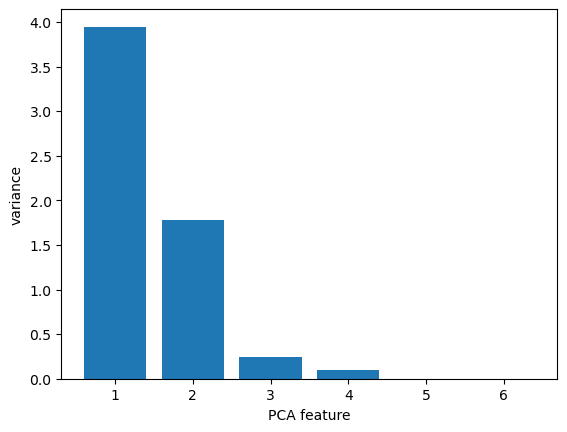

In [2]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Import PCA
from sklearn.decomposition import PCA

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(1, 1 + pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

It looks like PCA features 1 and 2 have significant variance.

#### Dimension reduction of the fish measurements

In the previous exercise, you saw that `2` was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as `scaled_samples`.

#### Instructions (3 points)

- Create a PCA instance called `pca` with `n_components=2`.
- Use the `.fit()` method of `pca` to fit it to the scaled fish measurements `scaled_samples`.
- Use the `.transform()` method of `pca` to transform the `scaled_samples`. Assign the result to `pca_features`.
- Print the shape of pca_features.
- Plot the transformed fish data in a scatter plot. use the first PCA feature as `x`, the second as `y`, `species` as color and `10` as size. 

(85, 2)


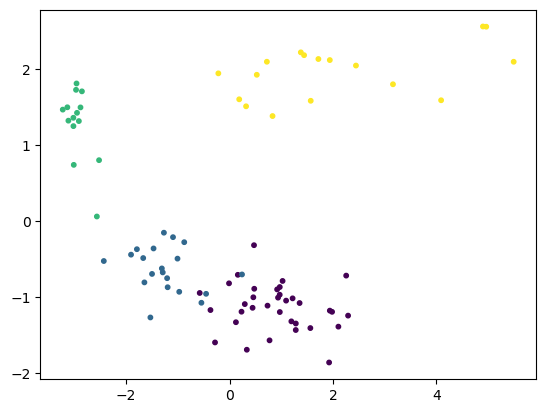

In [3]:
# scale the samples as question prompts
from sklearn import preprocessing
scaled_samples = preprocessing.scale(samples)

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

# extract the species of the fish
species = fish_df.iloc[:,0].replace({'Bream':0, 'Roach':1, 'Smelt':2, 'Pike':3}).values

# plot the fish data in 2 dimensions using PCA features
plt.scatter(pca_features[:,0], pca_features[:,1], c=species, s=10)